In [1]:
from sklearnex import patch_sklearn
patch_sklearn()


import pandas as pd
import numpy as np
from sklearn.preprocessing import (
    Binarizer,
    StandardScaler,
    LabelBinarizer,
    OneHotEncoder,
)
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
# from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.neural_network import MLPClassifier
# import dtale
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
# sns.set()
from sklearn import set_config
from sklearn.ensemble import StackingClassifier, HistGradientBoostingClassifier
from sklearn.gaussian_process.kernels import (
    Product,
    RBF,
    CompoundKernel,
    Exponentiation,
    Matern,
    Sum,
)
from sklearn.gaussian_process import GaussianProcessClassifier
from category_encoders import (
    TargetEncoder,
    BackwardDifferenceEncoder,
    BaseNEncoder,
    BinaryEncoder,
    CatBoostEncoder,
    CatBoostEncoder,
    GLMMEncoder,
    HelmertEncoder,
    JamesSteinEncoder,
    PolynomialEncoder,
    QuantileEncoder,
    SumEncoder,
    SummaryEncoder,
    WOEEncoder,
)
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    MinMaxScaler,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import warnings
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
import plotly.express as px
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
    GradientBoostingClassifier,
)
from sklearn.experimental import enable_halving_search_cv
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    # StratifiedGroupKFold,
    StratifiedKFold,
    GridSearchCV,
    RandomizedSearchCV,
    HalvingGridSearchCV,
    HalvingRandomSearchCV
)
import sigopt
from sklearn.naive_bayes import (
    BernoulliNB,
    CategoricalNB,
    MultinomialNB,
    ComplementNB,
    GaussianNB,
)
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import QuantileTransformer

# nb_est = [CategoricalNB(), MultinomialNB(), ComplementNB(), GaussianNB()]
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.tree import export_graphviz, plot_tree

# import seaborn as sns
# import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.feature_selection import (
    mutual_info_classif,
    SelectKBest,
    f_classif,
    chi2,
    RFE,
    SelectFdr,
    SelectFpr,
    SelectFwe,
    SelectPercentile,
)
from tbb import Monkey
# from xgboost import XGBClassifier
import os
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from joblib import parallel_backend
from category_encoders.wrapper import PolynomialWrapper, NestedCVWrapper
# from autosklearn.automl import AutoMLClassifier
import sklearn.metrics
pd.options.plotting.backend = "plotly"
pd.options.display.max_columns = 50
set_config(display="diagram")
warnings.filterwarnings("ignore")

dtype_info = {
    "v_1": "Binary",
    "v_26": "Binary",
    "v_11": "Binary",
    "v_14": "Binary",
    "v_30": "Binary",
    "v_28": "Binary",
    "v_9": "Binary",
    "v_27": "Binary",
    "v_32": "Nominal",
    "v_4": "Nominal",
    "v_3": "Nominal",
    "v_20": "Nominal",
    "v_21": "Nominal",
    "v_18": "Nominal",
    "v_25": "Nominal",
    "v_12": "Nominal",
    "v_31": "Ordinal",
    "v_15": "Ordinal",
    "v_19": "Ordinal",
    "v_13": "Ordinal",
    "v_33": "Ordinal",
    "v_17": "Ordinal",
    "v_29": "Ordinal",
    "v_23": "Ordinal",
    "v_6": "Ordinal",
    "v_24": "Ordinal",
    "v_10": "Ordinal",
    "v_5": "Ordinal",
    "v_22": "Ordinal",
    "v_0": "Ordinal",
    "v_16": "Ratio",
    "v_2": "Ratio",
    "v_8": "Ratio",
    "v_7": "Ratio",
    "v_39": "Ratio",
    "v_37": "Ratio",
    "v_38": "Ratio",
    "v_34": "Ratio",
    "v_40": "Ratio",
    "v_36": "Ratio",
    "v_35": "Ratio",
}
# data = pd.read_csv(
#     "../data/train.csv",
#     index_col=0,
# )
data__ = pd.read_parquet("../data/data_with_ridit.hdfs", engine="fastparquet")
prediction_data = pd.read_parquet("../data/test.parquet", engine="fastparquet")
data = pd.read_parquet("../data/train.parquet", engine="fastparquet")
ordinal = [i for i in dtype_info if dtype_info[i] == "Ordinal"]
nominal = [i for i in dtype_info if dtype_info[i] == "Nominal"]
binary = [i for i in dtype_info if dtype_info[i] == "Binary"]
ratio = [i for i in dtype_info if dtype_info[i] == "Ratio"]
final_data = pd.read_parquet("../data/final_data.parquet", engine="fastparquet")
final_pred_data = pd.read_parquet(
    "../data/final_pred_data.parquet", engine="fastparquet"
)
baseline_prediction_data = pd.read_parquet('../data/baseline.parquet')


def categorise_data(data):
    ordinal_data = data.loc[:, ordinal]
    nominal_data = data.loc[:, nominal]
    binary_data = data.loc[:, binary]
    ratio_data = data.loc[:, ratio]
    return ordinal_data, nominal_data, binary_data, ratio_data


ordinal_data, nominal_data, binary_data, ratio_data = categorise_data(final_data)
baseline_prediction_data.rename(columns={'label':'target'}, inplace=True)
final_data.rename(columns={'label':'target'}, inplace=True)
data.rename(columns={'label':'target'}, inplace=True)
# baseline_prediction_data

bs = pd.concat([final_data,baseline_prediction_data], axis=0,ignore_index=True)
nominal_master_db = bs.loc[:, nominal]

def gen_train_test(data, p):
    Y = data.target
    X_2 = Y_2 = Y[Y == 2].index
    X_0 = Y_0 = Y[Y == 0].index
    X_1 = Y_1 = Y[Y == 1].index
    train_size = int(p * Y_2.shape[0])
    test_size = int((1 - p) * Y_2.shape[0])

    train_idx_2 = np.random.choice(Y_2, (train_size,))
    train_idx_1 = np.random.choice(Y_1, (train_size,))
    train_idx_0 = np.random.choice(Y_0, (train_size,))
    train_idx = np.r_[train_idx_0, train_idx_1, train_idx_2]
    # train_idx.shape

    test_idx_2 = np.random.choice(np.setdiff1d(Y_2, train_idx_2), (test_size,))
    test_idx_1 = np.random.choice(np.setdiff1d(Y_1, train_idx_1), (test_size,))
    test_idx_0 = np.random.choice(np.setdiff1d(Y_0, train_idx_0), (test_size,))
    test_idx = np.r_[test_idx_0, test_idx_1, test_idx_2]
    # test_idx.shape
    return train_idx, test_idx

nominal_cont_map=defaultdict(dict)
nominal_indvl_map=defaultdict(dict)
for c in nominal:
    un = sorted(nominal_master_db[c].unique().tolist())
    n = len(un)
    new_id = list(range(n))
    nominal_indvl_map[c] = dict(zip(un,new_id))
start = 0
for c in nominal:
    un = sorted(nominal_master_db[c].unique().tolist())
    n = len(un)
    new_id = list(range(start,start+n))
    nominal_cont_map[c] = dict(zip(un,new_id))
    start += n


nominal_master_db_indvl = nominal_master_db.copy()
nominal_master_db_cont = nominal_master_db.copy()


# nominal_indvl_map
def nm_indvl_data_trnsform(row):
    for c in nominal:
        curr = row[c]
        row[c] = nominal_indvl_map[c][curr]
    return row


test1_nominal = nominal_master_db_indvl.apply(nm_indvl_data_trnsform,axis=1)


def nm_cont_data_trnsform(row):
    for c in nominal:
        curr = row[c]
        row[c] = nominal_cont_map[c][curr]
    return row


test2_nominal = nominal_master_db_cont.apply(nm_cont_data_trnsform,axis=1)


def best_n_features(n, X_train, y_train):
    ohe = OneHotEncoder(
        min_frequency=0.00001, handle_unknown="infrequent_if_exist", sparse=False
    )
    X_train_t = ohe.fit_transform(X_train)
    mic = mutual_info_classif(X_train_t, y_train, discrete_features=True)

    return ohe.get_feature_names_out()[mic.argsort()[-n:]]


# prediction_data = pd.read_pickle("../data/pred_data.pkl")
# est_ = [("cnb",CategoricalNB()),]
def iv_woe(data, target, bins=10, show_woe=False):

    # Empty Dataframe
    newDF, woeDF = pd.DataFrame(), pd.DataFrame()

    # Extract Column Names
    cols = data.columns

    # Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in "bifc") and (len(np.unique(data[ivars])) > 1000):
            binned_x = pd.qcut(data[ivars], bins, duplicates="drop")
            d0 = pd.DataFrame({"x": binned_x, "y": data[target]})
        else:
            d0 = pd.DataFrame({"x": data[ivars], "y": data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ["Cutoff", "N", "Events"]
        d["% of Events"] = np.maximum(d["Events"], 0.5) / d["Events"].sum()
        d["Non-Events"] = d["N"] - d["Events"]
        d["% of Non-Events"] = np.maximum(d["Non-Events"], 0.5) / d["Non-Events"].sum()
        d["WoE"] = np.log(d["% of Non-Events"] / d["% of Events"])
        d["IV"] = d["WoE"] * (d["% of Non-Events"] - d["% of Events"])
        d.insert(loc=0, column="Variable", value=ivars)
        print("Information value of " + ivars + " is " + str(round(d["IV"].sum(), 6)))
        temp = pd.DataFrame(
            {"Variable": [ivars], "IV": [d["IV"].sum()]}, columns=["Variable", "IV"]
        )
        newDF = pd.concat([newDF, temp], axis=0)
        woeDF = pd.concat([woeDF, d], axis=0)

        # Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

def wf_create(cat_encoder, model):
    encoder__name = cat_encoder.__class__.__name__
            # model = ComplementNB(norm=True,fit_prior=True,)
    # model = MultinomialNB()
    # model = LogisticRegression(n_jobs=-1, max_iter=10000,random_state=19)
    model__name = model.__class__.__name__
    pipe = Pipeline(steps=[('PW' + encoder__name, PolynomialWrapper(feature_encoder=cat_encoder)),
                           (model__name,model )])
    report = em.run(pipe) # Store A test log
    print('PW' + encoder_name, model__name)
    return pipe


def plot_m_variance(d_coll):
    sns.set()
    ddx= [x for x,y,u,r in d_coll]
    ddc = [y for x,y,u,r in d_coll]
    ddep = [y+u for x,y,u,r in d_coll]
    dden = [y-u for x,y,u,r in d_coll]
    ddem = [r for x,y,u,r in d_coll]
    plt.plot(ddx,ddc,'b',label="\u00b5")
    plt.plot(ddx,ddep,'r',label="\u03c3"+"+")
    plt.plot(ddx,dden,'g',label="\u03c3"+"-")
    plt.plot(ddx,ddem,'y',label="\u03c3"+"max")
    fig=plt.fill_between(ddx,ddep,dden,alpha=0.5)
    fig = plt.legend()
# print(pipe)
# wf_create(TargetEncoder(),RandomForestClassifier())
final_data_indvl_test = final_data.copy()
final_pred_data_indvl_test = final_pred_data.copy()
final_data_indvl_test.loc[:,nominal] = test1_nominal.loc[final_data.index,:]
final_pred_data_indvl_test.loc[:,nominal] = test1_nominal.loc[3796:,:]

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [57]:
from pymongo import MongoClient
mdb = MongoClient()
# mdb.list_database_names()
class evaluate_model:
    collector = mdb.ml_results.cv_results
    
    
    def __init__(self, model, data=pd.DataFrame(), features=[]):
        self.model = model
        if data.shape[0]>0:
            self.data = data
        else:
            self.data = pd.read_parquet('../data/final_data.parquet', engine='fastparquet')
        if len(features)>0:
            self.features = features
        else:
            self.features = list(self.data.columns)
        self.train_idx, self.test_idx = gen_train_test(self.data, 1.0)
        self.X_train = self.data.loc[self.train_idx, self.features]
        self.y_train = self.data.target.loc[self.train_idx]
        self.cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5)
        self.cv_results = None
        self.legacy=0
        
        
    def run(self, custom_model=None):
        if custom_model:
            selected_model = custom_model
        else:
            selected_model = self.model
        with parallel_backend('threading'):
            cv_results = cross_validate(selected_model,
                                        self.X_train,
                                        self.y_train,
                                        cv=self.cv,
                                        n_jobs=-1,
                                        scoring=['f1_micro',
                                                 'f1_macro',
                                                 'f1_weighted',
                                                 'precision_micro',
                                                 'precision_macro',
                                                 'precision_weighted',
                                                 'recall_micro',
                                                 'recall_macro',
                                                 'recall_weighted'],return_train_score=True,return_estimator=True)
                                        # error_score='raise',return_estimator=True)
                                    ## Save this results
        self.cv_results = cv_results
        # cv_db.insert_one(cv_results)
        # cnst = {'estimator_params': selected_model.get_params()}
        record =  {}
        record['estimator_params'] = str(selected_model.get_params())
        
        record['model_name'] = selected_model.__class__.__name__
        record['features'] = list(self.features)
        # record['data_idx'] = {'train_idx': list(self.train_idx),'test_idx': list(self.test_idx)}
        # cnst['fit_time'] = list(cv_results['fit_time'])
        for k,v in cv_results.items():
            if k in ['estimator','fit_time','score_time']:
                continue
            else:
                record[k] = v.mean()
        # for _ in cv_db.find():
        #     print(_.keys())
        # print(record)
        record['is_legacy_run'] = self.legacy
        record['legacy_report'] = None
        if self.legacy ==1:
            # print(self.legacy_run())
            l_rpt = self.legacy_run()
            for k, v in l_rpt.items():
                print(k)
                print('~'*20)
                print(v)
                print("#"*90)
            record['legacy_report'] = l_rpt
        
        collector.insert_one(record)
        
        return cv_results
    
    
    def plot(self):
        sns.set()
        fig, axes = plt.subplots(3, 3, figsize=(18, 15))        
        # fig.layout='constrained'

        metrics = ['f1_micro', 'f1_macro', 'f1_weighted', 'precision_micro', 'precision_macro', 'precision_weighted', 'recall_micro', 'recall_macro', 'recall_weighted']
        # for m  in metrics:
        #     n = len(self.cv_results['test_'+m])
        idx=0
        for i in range(3):
            n = len(self.cv_results['test_'+ metrics[0]])
            for j in range(3):
                axes[i,j].plot(range(n),self.cv_results['test_'+metrics[idx]],label=['test_'+metrics[idx]])
                # axes[i,j].plot(range(n),self.cv_results['train_'+metrics[idx]],label=['train_'+metrics[idx]])
                # axes[i,j].fill_between(range(n),self.cv_results['test_'+metrics[idx]],self.cv_results['train_'+metrics[idx]])
                axes[i,j].legend()
                axes[i,j].set_title(metrics[idx])
                # axes[i,j].autoscale(enable=False)
                idx+=1
        plt.legend()
    
    
    def plot_metric(self, metric):
        ydata = self.cv_results['test_'+metric]
        n = ydata.shape[0]
        ffig = plt.plot(np.arange(n),ydata,)
        fig = sns.regplot(x=np.arange(n), y=ydata)
        plt.title(metric.upper())
        return
    
    
    def switch_to_main_data(self):
        if self.legacy==1:
            print("#"*100)
            print("ALREADY ON LEGACY MODE")
            print("#"*100)
            return
        self.legacy = 1
        self.X_train_old = self.X_train
        self.y_train_old = self.y_train
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data.loc[:,self.features], self.data.target)
        print("#"*100)
        print("SWITCHING TO LEGACY MODE")
        print("#"*100)
        
        
    def reset(self):
        if self.legacy==0:
            print("#"*100)
            print("NOT ON LEGACY MODE")
            print("#"*100)
            return
        self.legacy = 0
        self.X_train = self.X_train_old
        self.y_train = self.y_train_old
    
    
    def legacy_run(self):
        self.model.fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)
        self.legacy_report = {}
        self.legacy_report['classification_report'] = classification_report(self.y_test, self.y_pred)
        self.legacy_report['balanced_accuracy'] = sklearn.metrics.balanced_accuracy_score(self.y_test, self.y_pred)
        return self.legacy_report

    
    def print_last_run_stat(self):
        N = collector.estimated_document_count()
        idx = 0
        for c in collector.find(skip=N-1):
            for k,v in c.items():
                if 'f1_' in k and 'test' in k:
                    print(k)
                    print('~'*5)
                    print(v)
                    print('-'*20)
            print('#'*100)

In [194]:
features_selected= {0:[],
                   1:[],
                   2:[]}
selectors = {0:[],
            1:[],
            2:[]}
feature_selection_df = {0:None,
                       1:None,
                       2:None}
feature_performance = {0:None,
                       1:None,
                       2:None}
improvements = {0:[],
                   1:[],
                   2:[]}

In [ ]:
ohe = OneHotEncoder(sparse=False,)
encoded_nominal = ohe.fit_transform(bs.loc[:,nominal])
# encoded_nominal[]
enc_nom_df = pd.DataFrame(encoded_nominal,columns=ohe.get_feature_names_out())
# final_data.shape
enc_nom_df = enc_nom_df.loc[:3795, :]
enc_nom_df

In [ ]:
from sklearnex.cluster import DBSCAN, KMeans     
from sklearn.feature_selection import RFECV
from sklearn.base import clone as model_clone
from sklearnex.svm import NuSVC,SVR
from sklearn.feature_selection import VarianceThreshold
SVR


        # model = 
estimator =make_pipeline(VarianceThreshold(),LogisticRegression(solver='liblinear',n_jobs=-1,C=0.03,random_state=2, fit_intercept=False))
# RFECV
# features_selected = defaultdict(list)
# selectors = []
# for _ in range(5):
try:
    idx=0
    for X, y in tr_nom_db:
        X_train, X_test, y_train, y_test = train_test_split(enc_nom_df,y,test_size=0.3,random_state=42)
        vt = VarianceThreshold()
        print(f'Shape of data {X_train.shape}')
        __c = vt.fit_transform(X_train)
        print(f'Dim Reduction {X_train.shape[1]-__c.shape[1]}')
        
        # Baseline
        model = model_clone(estimator)
        model.fit(X_train,y_train)
        acc_init = sklearn.metrics.f1_score(model.predict(X_test),y_test,average='micro')
        print(f'baseline f-1 score {acc_init}')
        print(f'Running SFS')
        with parallel_backend('loky'):
            # selector = SequentialFeatureSelector(model_clone(estimator),tol=0.001,n_features_to_select='auto',cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=2),n_jobs=-1,scoring='f1_micro',)
            selector = RFECV(model_clone(estimator)[1],step=5,cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=2),n_jobs=-1,scoring='f1_micro',)
            selector.fit(enc_nom_df, y)
        new_data = selector.transform(enc_nom_df)
        print(f'SFS Dim Reduction {X_train.shape[1]-new_data.shape[1]}')
        
        X_train, X_test, y_train, y_test = train_test_split(new_data,y,test_size=0.3,random_state=42)
        model = model_clone(estimator)
        model.fit(X_train,y_train)
        acc_improved = sklearn.metrics.f1_score(model.predict(X_test),y_test,average='micro')
        print(f"Improved By {acc_improved - acc_init} on {idx} Label")
        improvements[idx].append(acc_improved-acc_init)
        print(f'New F-1 Score {acc_improved}')
        idx+=1
except KeyboardInterrupt:
    print("Stopped Checking")
    # print(acc_improved)
    print(acc_init)
        # y_pred = 
    # features_selected
    # # selectors
    # # Nominal Feature Performance

# for i in range(3):
#     feature_selection_df[i] = pd.DataFrame(features_selected[i], columns=nominal)
#     feature_performance[i] = feature_selection_df[i].mean(axis=0).round(2).to_dict()
# pd.DataFrame(feature_performance).transpose()

Shape of data (2657, 481)
Dim Reduction 16
baseline f-1 score 0.7006145741878841
Running SFS
SFS Dim Reduction 60
Improved By -0.0017559262510974394 on 0 Label
New F-1 Score 0.6988586479367866
Shape of data (2657, 481)
Dim Reduction 16
baseline f-1 score 0.62071992976295
Running SFS
SFS Dim Reduction 75
Improved By 0.0008779631255486642 on 1 Label
New F-1 Score 0.6215978928884986
Shape of data (2657, 481)
Dim Reduction 16
baseline f-1 score 0.8103599648814751
Running SFS
SFS Dim Reduction 370
Improved By 0.0 on 2 Label
New F-1 Score 0.8103599648814751


In [ ]:
pd.get_dummies(data.target)

,0,1,2
id,,,
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
3791,0,0,1
3792,0,0,1
3793,1,0,0


In [63]:
# final_data_indvl_test
# One Hot Encoding of All the Categories
# Variance Threshold removal
sns.set()
# fig,ax = plt.subplots(3,1,squeeze=False,)
# final_data.plot()
# plt.Figure(fig_size=(30,20))
pd.options.plotting.backend='matplotlib'
# final_data_indvl_test = pd.get_dummies(final_data_indvl_test,columns=nominal)
targets = pd.get_dummies(final_data.target)
f_sets_kendall = {}
f_sets_p = {}
for i in range(3):
    # plt.figure(figsize=(30,30))
    
    g1= final_data_indvl_test.drop(['target'],axis=1).astype(np.float64).corrwith(pd.get_dummies(final_data.target)[i], method='kendall').sort_values()
    g2 = g1[(g1>0) | (g1<0)]
    non_lin,lin = g1[g1<0].index, g1[g1>0].index
    f_sets_kendall[i]=(non_lin,lin)
    g1= final_data_indvl_test.drop(['target'],axis=1).astype(np.float64).corrwith(pd.get_dummies(final_data.target)[i], method='pearson').sort_values()
    g2 = g1[(g1>0) | (g1<0)]
    non_lin,lin = g1[g1<0].index, g1[g1>0].index
    f_sets_p[i]=(non_lin,lin)
    
# g1= final_data_indvl_test[final_data_indvl_test.target == i ].drop(['target'],axis=1).astype(np.float64).var().sort_values()
# g2 = baseline_prediction_data[baseline_prediction_data.target == i ].drop(['target'],axis=1).astype(np.float64).var().sort_values()
# g1.loc[g2.index].plot(stacked=False,colormap='inferno',title=f'\u03c3 of Training Data_Features {i}', fontsize=11,figsize=(30,20),kind='line',alpha=1.0,ax=ax[i][0])
# ax[i][0].vl
# plt.hlines
# ax[i][0].hlines(0.0001,0.001,-0.001,color="red")
# g2.plot(stacked=True,colormap='flare',title=f'\u03c3 of Testing Data_Features {i}', fontsize=11,figsize=(30,20),kind='bar',alpha=1.0,ax=ax[i][1])
# plt.legend()


# final_data_indvl_test.drop(['target'],axis=1).astype(np.float64).var().sort_values().plot(color='r',label='\u03c3 of Training Data_Features', fontsize=11,figsize=(30,10),kind='bar',alpha=1.0)
# baseline_prediction_data.drop(['target'],axis=1).astype(np.float64).var().sort_values().plot(color='g',label='\u03c3 of Unknown Data_Features', fontsize=11,figsize=(30,10),kind='bar',alpha=0.3)
# plt.autoscale(enable=True)
# plt.xlabel(final_data_indvl_test.drop(['target'],axis=1).columns)
# plt.xticks(list(final_data_indvl_test.drop(['target'],axis=1).columns))
# plt.xcorr(final_data_indvl_test.drop(['target'],axis=1).astype(np.float64).var(),baseline_prediction_data.drop(['target'],axis=1).astype(np.float64).var())

In [65]:
for k,v in f_sets_kendall.items():
    nl, l = f_sets_kendall[k]
    print(len(nl),len(l))

242 272
280 234
283 231


In [75]:
# nd: pd.DataFrame = final_data.loc[:,nominal].astype('float')
# nd.corrwith(final_data.loc[:,binary+ordinal+ratio].astype('float'))
final_data_indvl_test.corr(method='kendall')

,v_1,v_8,v_11,v_14,v_26,v_27,v_30,v_9,v_28,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,target,v_32_0,v_32_1,v_32_2,v_32_3,v_32_4,...,v_12_1,v_12_2,v_12_3,v_12_4,v_12_5,v_12_6,v_12_7,v_12_8,v_12_9,v_12_10,v_12_11,v_12_12,v_12_13,v_12_14,v_12_15,v_12_16,v_12_17,v_12_18,v_12_19,v_12_20,v_12_21,v_12_22,v_12_23,v_12_24,v_12_25
v_1,1.000000,0.367296,0.551593,0.655097,0.556433,0.557988,0.467432,0.513122,0.628382,0.296687,0.328143,0.313758,0.245404,0.034908,0.081015,0.091886,0.059737,0.054155,0.328880,0.017149,0.124029,-0.117851,0.136269,0.157774,0.097513,...,-0.657756,0.227325,0.216455,0.199260,0.217766,0.195702,0.191582,0.222695,0.217103,0.232492,-0.018035,-0.002805,0.024950,-0.018035,0.023607,-0.004859,-0.003967,0.003515,-0.025898,0.016637,0.041027,0.029034,-0.024338,-0.002805,-0.002805
v_8,0.367296,1.000000,0.251403,0.476061,0.447993,0.365461,0.393966,0.305541,0.457557,0.241518,0.221561,0.226537,0.163314,0.050167,0.050880,0.046872,0.024329,0.023404,0.239978,-0.077656,0.117179,-0.386582,0.087077,0.091343,0.055154,...,-0.480514,0.174968,0.146997,0.153903,0.157621,0.153387,0.166912,0.168930,0.154460,0.159847,0.016518,-0.009848,0.012976,-0.016749,0.012976,-0.017062,0.005793,-0.020269,-0.053229,0.008154,0.022454,0.014869,-0.013929,-0.009848,-0.009848
v_11,0.551593,0.251403,1.000000,0.527434,0.423026,0.475545,0.314034,0.426471,0.518179,0.159826,0.265069,0.273866,0.199644,0.040553,0.070008,0.054418,0.054387,0.045898,0.263708,0.023146,0.086954,-0.043983,0.096298,0.109651,0.110030,...,-0.530283,0.171625,0.157268,0.180580,0.174123,0.153835,0.183027,0.172812,0.170291,0.191078,-0.021965,0.006043,0.026142,-0.005920,0.021957,0.010469,0.023610,-0.015259,-0.034555,0.004225,0.034753,0.006043,-0.025458,0.006043,0.006043
v_14,0.655097,0.476061,0.527434,1.000000,0.646286,0.635767,0.532686,0.569327,0.731928,0.327514,0.387221,0.342487,0.296641,0.066047,0.102018,0.094650,0.065496,0.066326,0.386290,-0.011269,0.159779,-0.247187,0.135824,0.153311,0.100003,...,-0.754433,0.272582,0.255129,0.241569,0.247468,0.239494,0.218244,0.264199,0.223215,0.254758,-0.021767,-0.007248,0.030716,-0.021767,0.035271,-0.012557,-0.010251,0.005409,-0.039176,0.015535,0.015535,0.029215,-0.010251,-0.007248,-0.007248
v_26,0.556433,0.447993,0.423026,0.646286,1.000000,0.424601,0.482802,0.453259,0.633672,0.283101,0.311889,0.326872,0.249359,0.038321,0.088855,0.062875,0.061578,0.058331,0.313686,-0.086912,0.116822,-0.256917,0.109191,0.161061,0.105872,...,-0.659244,0.234318,0.208678,0.205262,0.203186,0.193663,0.216763,0.198763,0.199156,0.237465,-0.017484,-0.009056,0.027113,-0.017484,0.025702,0.001120,0.016619,0.023251,-0.010974,0.012770,0.042114,0.029698,0.007775,-0.009056,0.020050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v_12_21,0.041027,0.022454,0.034753,0.015535,0.042114,0.043818,0.034235,0.037324,0.045997,0.021691,0.018456,0.000324,0.021950,-0.008386,0.016889,0.005238,0.003036,0.015767,0.029063,-0.010873,-0.002083,-0.015820,-0.002049,-0.002117,-0.002215,...,-0.047456,-0.003433,-0.003101,-0.003192,-0.003078,-0.002934,-0.003101,-0.003237,-0.003030,-0.003215,-0.001119,-0.000373,-0.000373,-0.001119,-0.000373,-0.000646,-0.000527,-0.001119,-0.002015,-0.000527,1.000000,-0.000373,-0.000527,-0.000373,-0.000373
v_12_22,0.029034,0.014869,0.006043,0.029215,0.029698,0.030980,0.010929,-0.011518,0.028881,0.022854,0.022524,-0.007727,0.008030,-0.002559,0.022942,-0.009874,-0.006268,0.014078,0.007598,-0.019626,-0.001473,-0.011185,-0.001449,-0.001497,-0.001566,...,-0.033552,-0.002427,-0.002192,-0.002257,-0.002176,-0.002075,-0.002192,-0.002289,-0.002143,-0.002273,-0.000791,-0.000264,-0.000264,-0.000791,-0.000264,-0.000457,-0.000373,-0.000791,-0.001424,-0.000373,-0.000373,1.000000,-0.000373,-0.000264,-0.000264
v_12_23,-0.024338,-0.013929,-0.025458,-0.010251,0.007775,-0.003373,-0.019146,-0.016291,0.037562,-0.008383,0.011225,0.002552,-0.00772

In [3]:
final_data_indvl = final_data_indvl_test.astype(np.float64)

In [82]:
fi_indvl_corr = final_data_indvl.corr(method='kendall')

In [7]:
final_data_indvl = pd.get_dummies(final_data_indvl,columns=nominal)

In [112]:
# final_data_indvl.info
strg_msk= fi_indvl_corr[(fi_indvl_corr>0.3)|(fi_indvl_corr<-0.3)]
strg_msk = strg_msk.fillna(0)
# penalize corr with itself
for c in strg_msk.columns:
    strg_msk.loc[c,c]=0
strg_msk=strg_msk.dropna()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.16it/s]


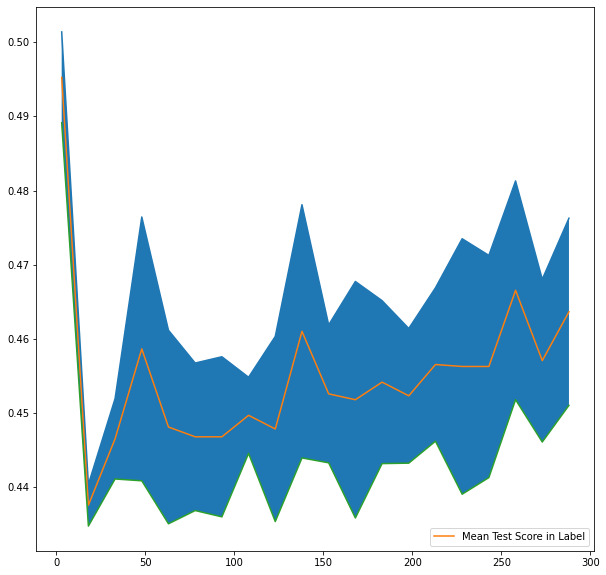

In [27]:
from sklearn.cluster import FeatureAgglomeration
from joblib.memory import Memory
from tqdm import trange

mean_test_val=[]
nw_noms = set(final_data_indvl.columns) -set(binary)-set(ratio)-set(ordinal)
nw_noms = nw_noms -{'target'}
nw_noms = list(nw_noms)
mem = Memory('../data/tmp/')
for _i in trange(3,300,15):
    f_agg = FeatureAgglomeration(n_clusters=_i,affinity='euclidean',memory=mem,compute_full_tree=True,linkage='ward',compute_distances=True)
    check = f_agg.fit_transform(final_data_indvl.loc[:,nw_noms].astype(np.float64))
#     for i in range(3):
    with parallel_backend('loky'):
#         rpt = cross_validate(OneVsOneClassifier(NuSVC(nu=0.5,kernel='poly',degree=4,random_state=0)),check,final_data.target,cv=3,n_jobs=-1)
        rpt = cross_validate(OneVsOneClassifier(DecisionTreeClassifier(random_state=0)),check,final_data.target,cv=3,n_jobs=-1)
    mean_test_val.append((_i,rpt['test_score'].mean(),rpt['test_score'].std()))

def plot_agg_perf(mean_test_val=mean_test_val):
    plt.figure(figsize=(10,10))
    # for i in range(3):
    c, mu , err = zip(*mean_test_val)
    nerr =np.asarray(mu)+ -1*np.asarray(err)
    perr =np.asarray(mu)+ np.asarray(err)
    # perr = mu+err
    fi =plt.plot(c,perr)
    fi = plt.plot(c,mu,label=f'Mean Test Score in Label')
    fi = plt.plot(c,nerr)
    plt.fill_between(c,perr,nerr,)
    tg = plt.legend(loc='lower right')
plot_agg_perf()

In [28]:
import gc;gc.collect()

34892